In [3]:
import pandas as pd

# Cargar el archivo limpio
file_path = '../data/silver/ExporteCOL2023-2024_clean.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas para revisar la estructura
print(df.head())

# Resumen estadístico de las variables numéricas
print(df.describe())

    Año  Mes         Uen                Canal Comercial  Marquilla  \
0  2023    1  DECORATIVO  Cadenas y Grandes Superficies  AEROCOLOR   
1  2023    1  DECORATIVO  Cadenas y Grandes Superficies  AEROCOLOR   
2  2023    1  DECORATIVO  Cadenas y Grandes Superficies  AEROCOLOR   
3  2023    1  DECORATIVO  Cadenas y Grandes Superficies  AEROCOLOR   
4  2023    1  DECORATIVO  Cadenas y Grandes Superficies  AEROCOLOR   

   Código Producto                                           Producto  \
0         10228785  LACA AZUL ESPANOL BRILLANTE AEROCOLOR AEROSOLE...   
1         10228835  LACA BLANCO MATE AEROCOLOR AEROSOLES 125031-80...   
2         10228920  LACA NEGRO BRILLANTE AEROCOLOR AEROSOLES 12500...   
3         10228936  LACA NEGRO MATE AEROCOLOR AEROSOLES 125012-801...   
4         10228976  LACA ROJO CLARO BRILLANTE AEROCOLOR AEROSOLES ...   

   Numérica Clientes  Numérica Documentos  Ventas Galones    Ventas  \
0                  1                    2        2.536998  265860.0  

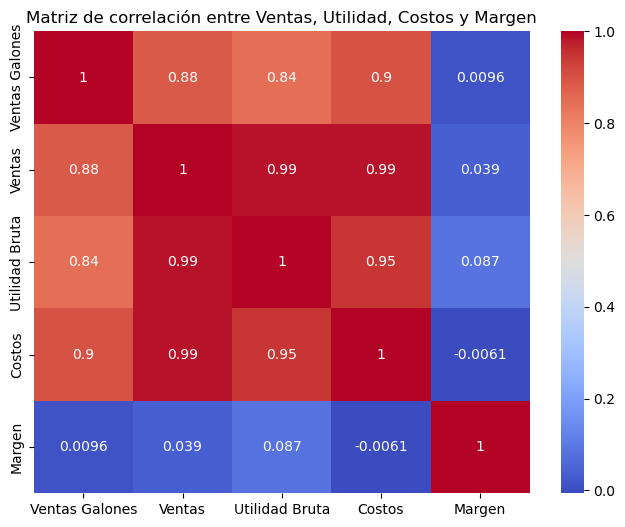

In [43]:
# Matriz de correlación
correlation_matrix = df[['Ventas Galones', 'Ventas', 'Utilidad Bruta', 'Costos', 'Margen']].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre Ventas, Utilidad, Costos y Margen')
plt.show()

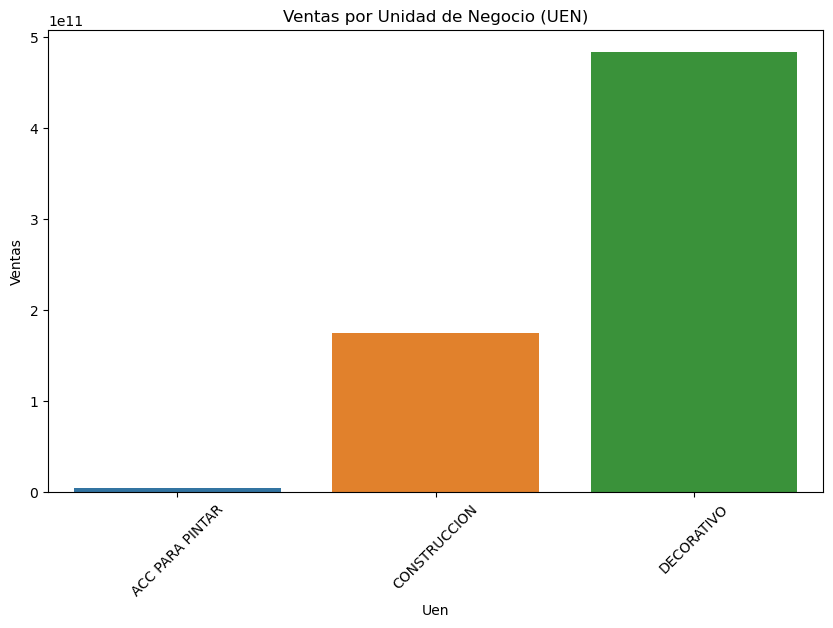

In [11]:
# Ventas por UEN
ventas_por_uen = df.groupby('Uen')['Ventas'].sum().reset_index()

# Visualización de las ventas por UEN
plt.figure(figsize=(10, 6))
sns.barplot(x='Uen', y='Ventas', data=ventas_por_uen)
plt.title('Ventas por Unidad de Negocio (UEN)')
plt.xticks(rotation=45)
plt.show()

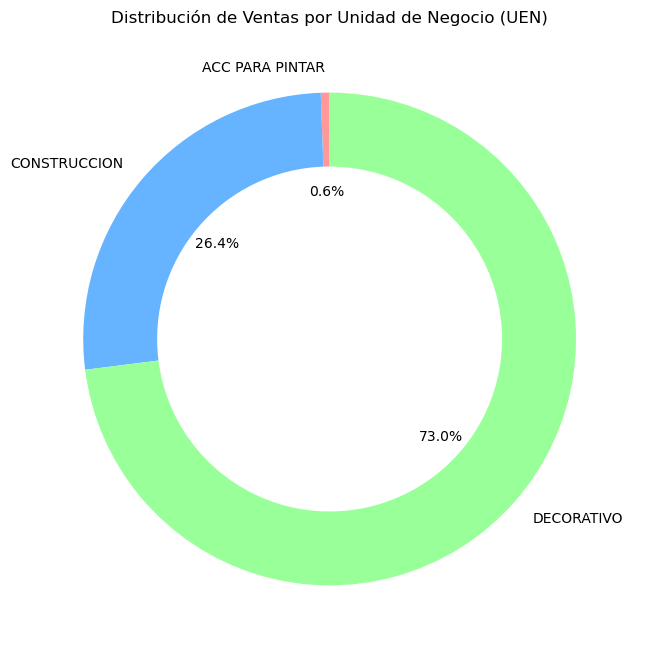

In [37]:
import matplotlib.pyplot as plt

# Sumar las ventas por Unidad de Negocio (UEN)
ventas_por_uen = df.groupby('Uen')['Ventas'].sum().reset_index()

# Crear gráfico de pastel (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(ventas_por_uen['Ventas'], labels=ventas_por_uen['Uen'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'], wedgeprops=dict(width=0.3))
plt.title('Distribución de Ventas por Unidad de Negocio (UEN)')
plt.show()


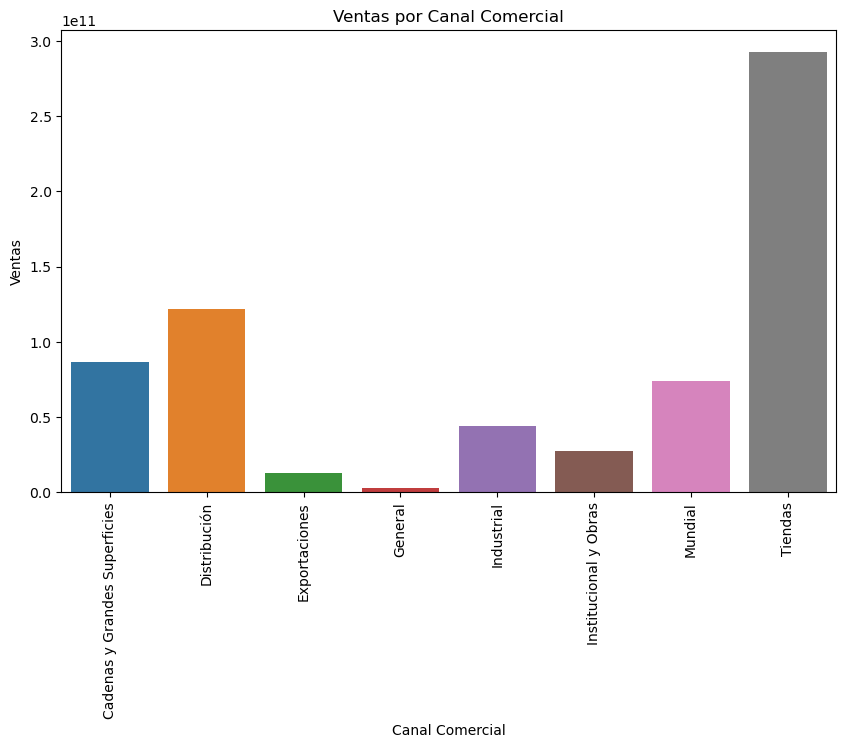

In [33]:
# Sumar las ventas por Canal Comercial
ventas_por_canal = df.groupby('Canal Comercial')['Ventas'].sum().reset_index()

# Visualización de las ventas por Canal Comercial
plt.figure(figsize=(10, 6))
sns.barplot(x='Canal Comercial', y='Ventas', data=ventas_por_canal)
plt.title('Ventas por Canal Comercial')
plt.xticks(rotation=90)
plt.show()


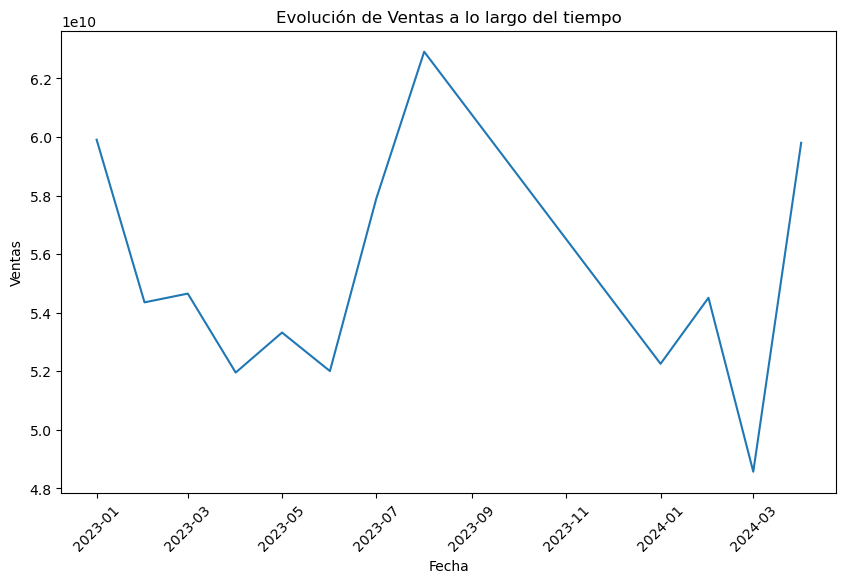

In [15]:
# Ventas por mes y año
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].astype(str), format='%Y-%m')
ventas_por_mes = df.groupby('Fecha')['Ventas'].sum().reset_index()

# Visualización de la evolución de ventas a lo largo del tiempo
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fecha', y='Ventas', data=ventas_por_mes)
plt.title('Evolución de Ventas a lo largo del tiempo')
plt.xticks(rotation=45)
plt.show()

       Ventas Galones        Ventas  Utilidad Bruta        Costos  \
count    49413.000000  4.941300e+04    4.941300e+04  4.941300e+04   
mean       323.501160  1.340057e+07    6.253943e+06  7.146627e+06   
std       1829.825133  5.980269e+07    2.927825e+07  3.133558e+07   
min          0.000000  1.000000e+00    5.925308e-02  0.000000e+00   
25%          4.000000  3.421020e+05    1.418217e+05  1.844022e+05   
50%         20.190275  1.498890e+06    6.212900e+05  8.216421e+05   
75%        110.250000  7.002904e+06    2.961988e+06  3.815056e+06   
max      67790.000000  2.200677e+09    1.098176e+09  1.231247e+09   

             Margen  
count  4.941300e+04  
mean   4.425396e-01  
std    1.382876e-01  
min    8.879740e-08  
25%    3.515014e-01  
50%    4.526124e-01  
75%    5.442108e-01  
max    1.000000e+00  


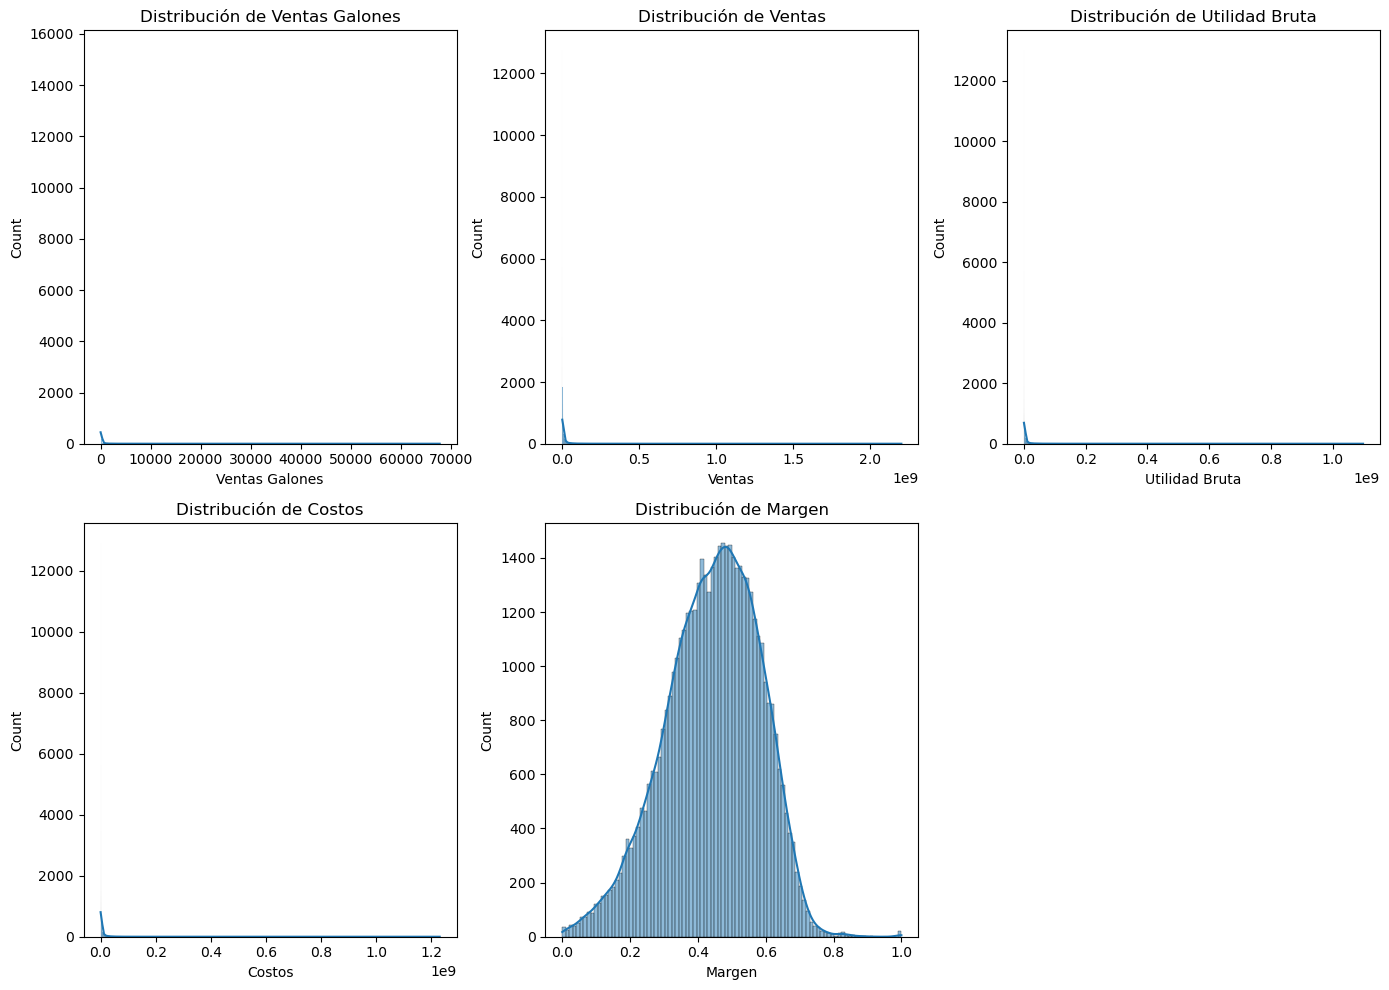

,Ventas Galones,Ventas,Utilidad Bruta,Costos,Margen
count,49413.00,49413.00,49413.00,49413.00,49413.00
mean,323.50,13400569.78,6253942.83,7146626.94,0.44
std,1829.83,59802687.16,29278245.06,31335584.74,0.14
min,0.00,1.00,0.06,0.00,0.00
25%,4.00,342102.00,141821.65,184402.17,0.35
50%,20.19,1498890.00,621290.03,821642.11,0.45
75%,110.25,7002904.00,2961988.13,3815056.11,0.54
max,67790.00,2200677249.00,1098175547.00,1231246766.00,1.00


In [27]:
# Seleccionar las columnas relevantes para el resumen estadístico
columns_of_interest = ['Ventas Galones','Ventas', 'Utilidad Bruta', 'Costos', 'Margen']

# Generar el resumen estadístico de las columnas seleccionadas
summary_statistics = df[columns_of_interest].describe()

# Mostrar el resumen estadístico
print(summary_statistics)

# Visualización de las distribuciones para las variables de interés
plt.figure(figsize=(14, 10))

for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    
plt.tight_layout()
plt.show()# Mostrar la tabla con estilo en el notebook
summary_styled = summary_statistics.style.format("{:.2f}").background_gradient(cmap='coolwarm')
summary_styled